In [5]:
import pandas as pd
import tabula
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import zipfile
import tempfile
import requests
from io import BytesIO

### Obtención de datos de las fuentes de información
#### SHF

In [6]:
#Traer precios de vivienda de SHF
urlpdf="https://www.gob.mx/cms/uploads/attachment/file/995431/_ndice_SHF_T1_2025.pdf"
shf=tabula.read_pdf(urlpdf,multiple_tables=True, pages='9')
#Pasar a dataframe
shf=shf[0]
#Dejar solo las primeras dos columnas
shf=shf.iloc[:,0:2]
#Renombrar columnas
shf.columns=['estado','precio']
#Filtrar para cdmx
shf=shf[shf['estado'].str.contains('Ciudad de México')]
#Eliminar comas de precio y transformar a numérico
shf['precio']=shf['precio'].str.replace(',','').astype('float')
shf

,estado,precio
9,Ciudad de México,3866210.0


#### IMSS

In [7]:
#Leer diccionario de datos
url = "https://docs.google.com/spreadsheets/d/1EHwghxbwXLIRdebN9tILb-ORt7pwc5H9/edit#gid=887021272"
url_for_pandas = url.replace("/edit#gid=887021272", "/export?format=xlsx")
diccionario = pd.read_excel(url_for_pandas, engine='openpyxl',sheet_name='Rango salario', usecols='A:B',skipfooter=1,skiprows=1)
#Renombrar columnas
diccionario.columns=['rango_salarial','descripcion']
diccionario

,rango_salarial,descripcion
0,W1,Hasta 1 vez el salario mínimo
1,W2,mayor a 1 y hasta 2 veces el salario mínimo
2,W3,mayor a 2 y hasta 3 veces el salario mínimo
3,W4,mayor a 3 y hasta 4 veces el salario mínimo
4,W5,mayor a 4 y hasta 5 veces el salario mínimo
5,W6,mayor a 5 y hasta 6 veces el salario mínimo
6,W7,mayor a 6 y hasta 7 veces el salario mínimo
7,W8,mayor a 7 y hasta 8 veces el salario mínimo
8,W9,mayor a 8 y hasta 9 veces el salario mínimo
9,W10,mayor a 9 y hasta 10 veces el salario mínimo


In [8]:
url = "https://github.com/claudiodanielpc/vivienda_cdmx/raw/main/asg-2025-03-31.zip"

# Descargar el archivo ZIP
response = requests.get(url)
zip_file = zipfile.ZipFile(BytesIO(response.content))

# Crear un directorio temporal
with tempfile.TemporaryDirectory() as tmpdirname:
    # Extraer el contenido del archivo ZIP en el directorio temporal
    zip_file.extractall(tmpdirname)
    
    # Buscar todos los archivos CSV en el directorio temporal
    csv_files = [f for f in zip_file.namelist() if f.endswith('.csv')]
    
    # Leer el primer archivo CSV
    if csv_files:
        imss = pd.read_csv(f"{tmpdirname}/{csv_files[0]}", sep='|', encoding='latin1', low_memory=False)
imss

,cve_delegacion,cve_subdelegacion,cve_entidad,cve_municipio,sector_economico_1,sector_economico_2,sector_economico_4,tamaño_patron,sexo,rango_edad,...,ta_sal,teu_sal,tec_sal,tpu_sal,tpc_sal,masa_sal_ta,masa_sal_teu,masa_sal_tec,masa_sal_tpu,masa_sal_tpc
0,1,1,1,A01,NaN,NaN,NaN,NaN,1,E1,...,0,0,0,0,0,0.00,0.0,0.0,0.00,0.0
1,1,1,1,A01,NaN,NaN,NaN,NaN,1,E10,...,0,0,0,0,0,0.00,0.0,0.0,0.00,0.0
2,1,1,1,A01,NaN,NaN,NaN,NaN,1,E11,...,0,0,0,0,0,0.00,0.0,0.0,0.00,0.0
3,1,1,1,A01,NaN,NaN,NaN,NaN,1,E12,...,0,0,0,0,0,0.00,0.0,0.0,0.00,0.0
4,1,1,1,A01,NaN,NaN,NaN,NaN,1,E13,...,0,0,0,0,0,0.00,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4601593,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E8,...,2,0,0,2,0,5657.00,0.0,0.0,5657.00,0.0
4601594,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E9,...,1,0,0,1,0,2828.50,0.0,0.0,2828.50,0.0
4601595,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E9,...,1,0,0,1,0,1707.46,0.0,0.0,1707.46,0.0
4601596,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E9,...,1,0,0,1,0,1894.35,0.0,0.0,1894.35,0.0


In [9]:
imss = imss[imss['cve_delegacion'].isin([39, 40])]
imss

,cve_delegacion,cve_subdelegacion,cve_entidad,cve_municipio,sector_economico_1,sector_economico_2,sector_economico_4,tamaño_patron,sexo,rango_edad,...,ta_sal,teu_sal,tec_sal,tpu_sal,tpc_sal,masa_sal_ta,masa_sal_teu,masa_sal_tec,masa_sal_tpu,masa_sal_tpc
4108833,39,11,9,NaN,NaN,NaN,NaN,NaN,1,E1,...,0,0,0,0,0,0.00,0.0,0.0,0.00,0.0
4108834,39,11,9,NaN,NaN,NaN,NaN,NaN,1,E10,...,0,0,0,0,0,0.00,0.0,0.0,0.00,0.0
4108835,39,11,9,NaN,NaN,NaN,NaN,NaN,1,E11,...,0,0,0,0,0,0.00,0.0,0.0,0.00,0.0
4108836,39,11,9,NaN,NaN,NaN,NaN,NaN,1,E12,...,0,0,0,0,0,0.00,0.0,0.0,0.00,0.0
4108837,39,11,9,NaN,NaN,NaN,NaN,NaN,1,E13,...,0,0,0,0,0,0.00,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4601593,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E8,...,2,0,0,2,0,5657.00,0.0,0.0,5657.00,0.0
4601594,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E9,...,1,0,0,1,0,2828.50,0.0,0.0,2828.50,0.0
4601595,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E9,...,1,0,0,1,0,1707.46,0.0,0.0,1707.46,0.0
4601596,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E9,...,1,0,0,1,0,1894.35,0.0,0.0,1894.35,0.0


In [10]:
print("Total de trabajadores asegurados en CDMX:", imss['ta'].sum())
print("Total de trabajadores asegurados con un salario asociado en CDMX:", imss['ta_sal'].sum())

Total de trabajadores asegurados en CDMX: 3466534
Total de trabajadores asegurados con un salario asociado en CDMX: 3463478


In [11]:
imss["rango_salarial"].unique()

array([nan, 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W11', 'W8', 'W10',
       'W9'], dtype=object)

In [12]:
#Muestra de registros con nan en rango_salarial
imss[imss['rango_salarial'].isnull()].head()

,cve_delegacion,cve_subdelegacion,cve_entidad,cve_municipio,sector_economico_1,sector_economico_2,sector_economico_4,tamaño_patron,sexo,rango_edad,...,ta_sal,teu_sal,tec_sal,tpu_sal,tpc_sal,masa_sal_ta,masa_sal_teu,masa_sal_tec,masa_sal_tpu,masa_sal_tpc
4108833,39,11,9,NaN,NaN,NaN,NaN,NaN,1,E1,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
4108834,39,11,9,NaN,NaN,NaN,NaN,NaN,1,E10,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
4108835,39,11,9,NaN,NaN,NaN,NaN,NaN,1,E11,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
4108836,39,11,9,NaN,NaN,NaN,NaN,NaN,1,E12,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
4108837,39,11,9,NaN,NaN,NaN,NaN,NaN,1,E13,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


#### Limpieza de datos y construcción de tabla resumen

In [13]:
#Crear tabla resumen de asegurados, masa y agrupado por rango_salarial
tabla_resumen = imss.groupby(['rango_salarial']).agg({'ta': 'sum', 'masa_sal_ta': 'sum'}).reset_index()
#Pegar descripción de rango_salarial
tabla_resumen = pd.merge(tabla_resumen, diccionario, on='rango_salarial', how='left')
#Obtener salario promedio
tabla_resumen['salario_prom_diario'] = tabla_resumen['masa_sal_ta'] / tabla_resumen['ta']
#Salario mensual
tabla_resumen['salario_prom_mensual'] = tabla_resumen['salario_prom_diario'] * 30.4
#Calcular 30% de salario promedio_mensual como mensualidad para vivienda
tabla_resumen['mensualidad_para_vivienda'] = tabla_resumen['salario_prom_mensual'] * 0.30
#Insertar columna precio_medio_vivienda de shf
tabla_resumen['precio_medio_vivienda'] = shf['precio'].mean()
#Calcular cuántos años se tarda en pagar la vivienda
tabla_resumen['tiempo_liquida_vivienda'] = round(tabla_resumen['precio_medio_vivienda'] / tabla_resumen['mensualidad_para_vivienda'] / 12,0)
#Transformar a entero
tabla_resumen['tiempo_liquida_vivienda'] = tabla_resumen['tiempo_liquida_vivienda'].astype('int')
#Ordenar de mayor a menor tiempo_liquida_vivienda
tabla_resumen=tabla_resumen.sort_values('tiempo_liquida_vivienda', ascending=False)
#Seleccionar columnas de descripcion, salario_prom_mensual, mensualidad y tiempo_liquida_vivienda
tabla_resumen=tabla_resumen[['descripcion','ta','precio_medio_vivienda','salario_prom_mensual','mensualidad_para_vivienda','tiempo_liquida_vivienda']]
print("Número de trabajadores con registro de salario", tabla_resumen["ta"].sum(),""
"\nPorcentaje respecto del total en dataframe IMSS",round(tabla_resumen["ta"].sum()/imss["ta"].sum()*100,1))
#Calcular porcentaje de ta
tabla_resumen['pct'] = round((tabla_resumen['ta'] / tabla_resumen['ta'].sum())*100,2)
#Renombrar columnas
tabla_resumen.columns=['Rango salarial','Trabajadores asegurados','Precio medio de la vivienda','Salario promedio mensual','Mensualidad para vivienda','Tiempo (años) para liquidar la vivienda', 'Porcentaje de trabajadores asegurados']
#Números con separador de miles y dos decimales
tabla_resumen['Precio medio de la vivienda'] = tabla_resumen['Precio medio de la vivienda'].map('{:,.2f}'.format)
tabla_resumen['Salario promedio mensual'] = tabla_resumen['Salario promedio mensual'].map('{:,.2f}'.format)
tabla_resumen['Mensualidad para vivienda'] = tabla_resumen['Mensualidad para vivienda'].map('{:,.2f}'.format)
tabla_resumen['Trabajadores asegurados'] = tabla_resumen['Trabajadores asegurados'].map('{:,}'.format)
tabla_resumen

Número de trabajadores con registro de salario 3463478 
Porcentaje respecto del total en dataframe IMSS 99.9


,Rango salarial,Trabajadores asegurados,Precio medio de la vivienda,Salario promedio mensual,Mensualidad para vivienda,Tiempo (años) para liquidar la vivienda,Porcentaje de trabajadores asegurados
0,Hasta 1 vez el salario mínimo,"30,334","3,866,210.00","8,475.39","2,542.62",127,0.88
3,mayor a 1 y hasta 2 veces el salario mínimo,"2,010,086","3,866,210.00","10,745.94","3,223.78",100,58.04
4,mayor a 2 y hasta 3 veces el salario mínimo,"468,507","3,866,210.00","20,648.71","6,194.61",52,13.53
5,mayor a 3 y hasta 4 veces el salario mínimo,"265,708","3,866,210.00","29,265.42","8,779.62",37,7.67
6,mayor a 4 y hasta 5 veces el salario mínimo,"160,329","3,866,210.00","37,843.58","11,353.07",28,4.63
7,mayor a 5 y hasta 6 veces el salario mínimo,"111,355","3,866,210.00","46,392.89","13,917.87",23,3.22
8,mayor a 6 y hasta 7 veces el salario mínimo,"83,878","3,866,210.00","54,888.51","16,466.55",20,2.42
9,mayor a 7 y hasta 8 veces el salario mínimo,"57,453","3,866,210.00","63,286.28","18,985.88",17,1.66
10,mayor a 8 y hasta 9 veces el salario mínimo,"43,884","3,866,210.00","71,931.93","21,579.58",15,1.27
1,mayor a 9 y hasta 10 veces el salario mínimo,"42,141","3,866,210.00","80,558.29","24,167.49",13,1.22


In [15]:
#Salvar tabla a excel
tabla_resumen.to_excel('tiempo_liquida_vivienda.xlsx', index=False)

### Visualización de resultados 

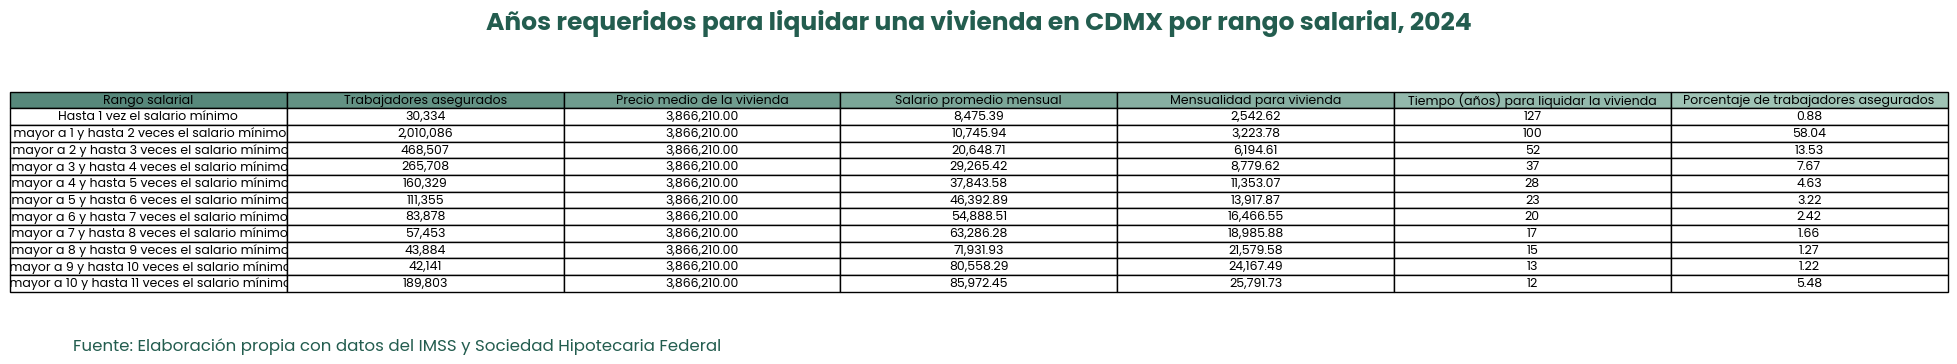

In [14]:
plt.rcParams['font.family'] = 'Poppins'
# Definir color de la tabla
colors = ["#235D4F", "#D3EEE1"] 
cm = LinearSegmentedColormap.from_list('custom', colors, N=256)

fig, ax = plt.subplots(figsize=(25, 4))
num_columns = len(tabla_resumen.columns)

# Aplicar el color a las columnas
col_colours = [cm(0.3 + i * (0.7 - 0.3) / (num_columns - 1)) for i in range(num_columns)]
#Agregar titulo
plt.title('Años requeridos para liquidar una vivienda en CDMX por rango salarial, 2024',  fontsize=18, fontweight='bold', color='#235D4F')
#Eliminar ejes
plt.axis('off')
#Añadir fuente
plt.text(0.2, 0, "Fuente: Elaboración propia con datos del IMSS y Sociedad Hipotecaria Federal"
                , ha='center', va='center', fontsize=12, color='#235D4F')

# Crear tabla
table = ax.table(cellText=tabla_resumen.values, colLabels=tabla_resumen.columns, loc='center', colColours=col_colours)

# Ajustar tamaño de fuente
table.auto_set_font_size(False)
table.set_fontsize(9)

# Centrar texto de las celdas
for key, cell in table.get_celld().items():
    cell.set_text_props(ha='center')
    
#Salvar tabla
plt.savefig('tiempo_liquida_vivienda.png', dpi=300, bbox_inches='tight')
